In [101]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [102]:
khasti = sns.load_dataset('titanic')

In [103]:
khasti.to_csv('khasti')

In [104]:
khasti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [105]:
ks = khasti

In [106]:
ks.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [107]:
ks.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [108]:
ks['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['C', 'E', 'G', 'D', 'A', 'B', 'F']

In [109]:
ks.shape

(891, 15)

In [110]:
ks[0:].nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

# Finding Missing Values in CSV

In [111]:
ks.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [112]:
# Removing Missing Value Data from Deck Column
khasti_clean = ks.drop(['deck'], axis = 1)
khasti_clean.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False


In [128]:
#  Fill the NaN values in age with 0
khasti_clean['age'] = khasti['age'].replace(np.nan, 0)
khasti_clean['embarked'] = khasti['embarked'].replace(np.nan, 0)
khasti_clean['embark_town'] = khasti['embark_town'].replace(np.nan, 0)

In [129]:
khasti_clean.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [130]:
khasti_clean.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

<AxesSubplot:ylabel='age'>

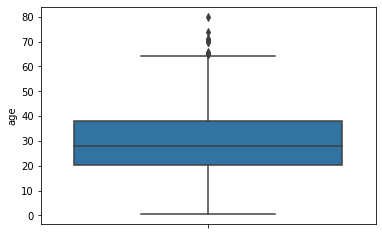

In [143]:
sns.boxplot( y = 'age', data=ks)

C:\Users\A Rehman\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

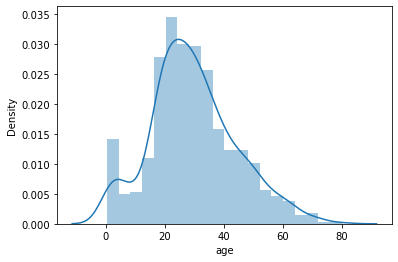

In [147]:
sns.distplot(ks['age'])

In [159]:
# Out liers removing
ks['age'].mean()



0.9921436588103255

In [169]:
khasti_clean = khasti_clean[khasti_clean['age'] < 68]
ks.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,True,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,True,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,True,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,True,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,True,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,True,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,True,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,True,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,True,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,True,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
